In [1]:
# import libraries
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
BASE_DIR = './tmp/data'
TRAIN_DIR = os.path.join(BASE_DIR, 'train.csv')
TEST_DIR = os.path.join(BASE_DIR, 'test.csv')

In [3]:
def wrangle(path):
    df = pd.read_csv(path).set_index("PassengerId")



    # df["Sex"] = (df["Sex"] == "male").astype(int)

    # Drop high cardinality categorical features
    high_cardinality = ["Name", "Ticket", "Cabin"]    
    df.drop(columns=high_cardinality, inplace=True)

    # Drop NaN values
    # df.dropna(inplace=True)

    return df

In [4]:
df = wrangle(TRAIN_DIR)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [5]:
df["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [7]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [8]:
# df["Cabin"].unique()

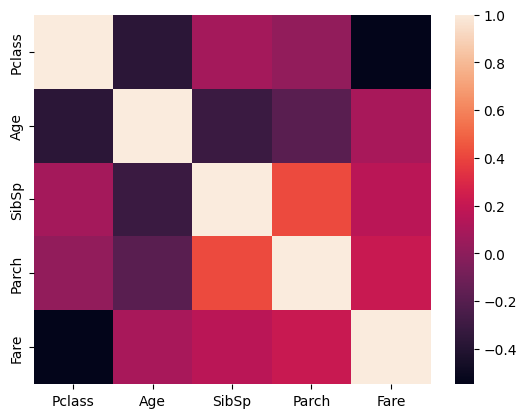

In [9]:
correlation = df.drop(columns="Survived").corr()
sns.heatmap(correlation);

In [10]:
# Histogram survived with their age
# plt.hist(x=df["Survived"], y=df["Sex"])

In [11]:
df["Survived"].corr(df["Age"])

-0.07722109457217764

In [13]:
# df["Survived"].corr(df["Sex"])

In [ ]:
correlation

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

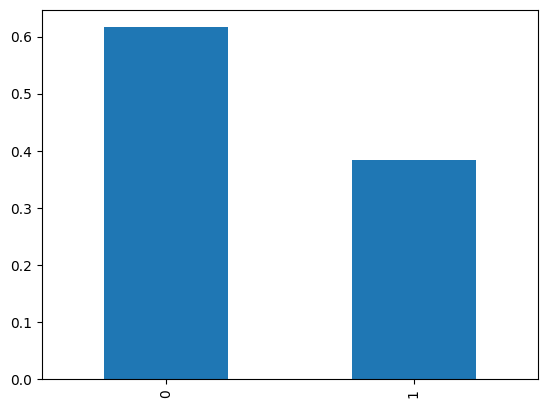

In [ ]:
df["Survived"].value_counts(normalize=True).plot(kind="bar")

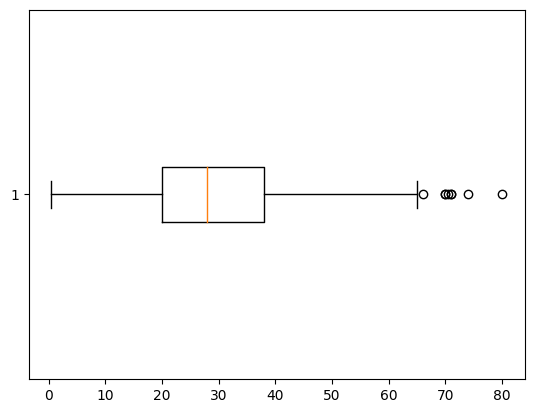

In [ ]:
plt.boxplot(df["Age"], vert=False);

In [ ]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
pd.pivot_table(df, index="Pclass", values="Survived", aggfunc=np.mean)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
pd.pivot_table(df, index="Sex", values="Survived", aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
pd.pivot_table(df, index="Embarked", values="Survived", aggfunc=np.mean)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [ ]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
pd.pivot_table(df, index="SibSp", values="Survived", aggfunc=np.mean)

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [ ]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
pd.pivot_table(df, index="Parch", values="Survived", aggfunc=np.mean)

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [ ]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,0.636236,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


In [ ]:
pd.pivot_table(df, index="Embarked", aggfunc=np.mean)

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived
Embarked,,,,,,,
C,30.814769,68.296767,0.415385,1.746154,0.530769,0.423077,0.607692
Q,28.089286,18.265775,0.392857,2.785714,0.571429,0.750000,0.285714
S,29.445397,27.476284,0.438628,2.328520,0.664260,0.523466,0.362816


In [ ]:
df[["Pclass", ""]]

In [ ]:
df["Fare"].nunique()

248

In [ ]:
pd.pivot_table(df, index="Pclass", values="Fare", aggfunc=np.mean)

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [ ]:
pd.pivot_table(df, index="Survived", values="Fare", aggfunc=np.mean)

,Fare
Survived,
0,22.117887
1,48.395408


In [17]:
pd.pivot_table(df, index="Parch", values="Survived", aggfunc=np.mean).sort_values(by="Survived", ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [27]:
pd.pivot_table(df, index="SibSp", values="Survived", aggfunc=np.mean).sort_values(by="Survived", ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [28]:
# plt.hist(a)

In [30]:
def visualization(df, index, value):
    result = pd.pivot_table(df, index=index, values=value, aggfunc=np.mean).sort_values(by=value, ascending=False)

    return result

In [47]:
a = visualization(df, "Pclass", "Survived")

Text(0.5, 1.0, 'Survived from Pclass')

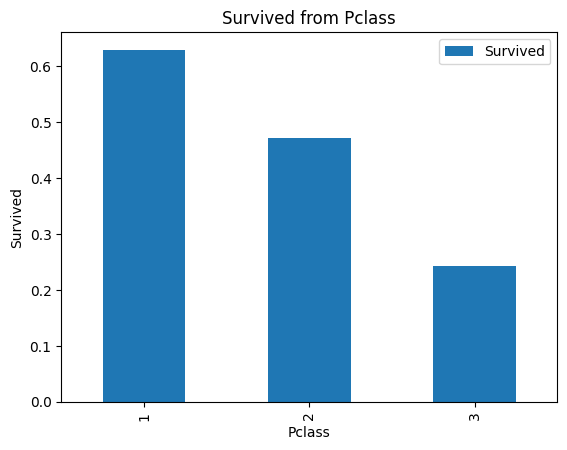

In [50]:
a.plot(kind="bar")
plt.xlabel("Pclass")
plt.ylabel("Survived")
plt.title("Survived from Pclass")

In [45]:
# a.hist(y="Survived")
a.head()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [53]:
pd.pivot_table(df, index="Survived", values="Age", aggfunc=np.mean)

,Age
Survived,
0,30.626179
1,28.343690


In [65]:
b = pd.pivot_table(df, index="Age", values="Survived", aggfunc="count")

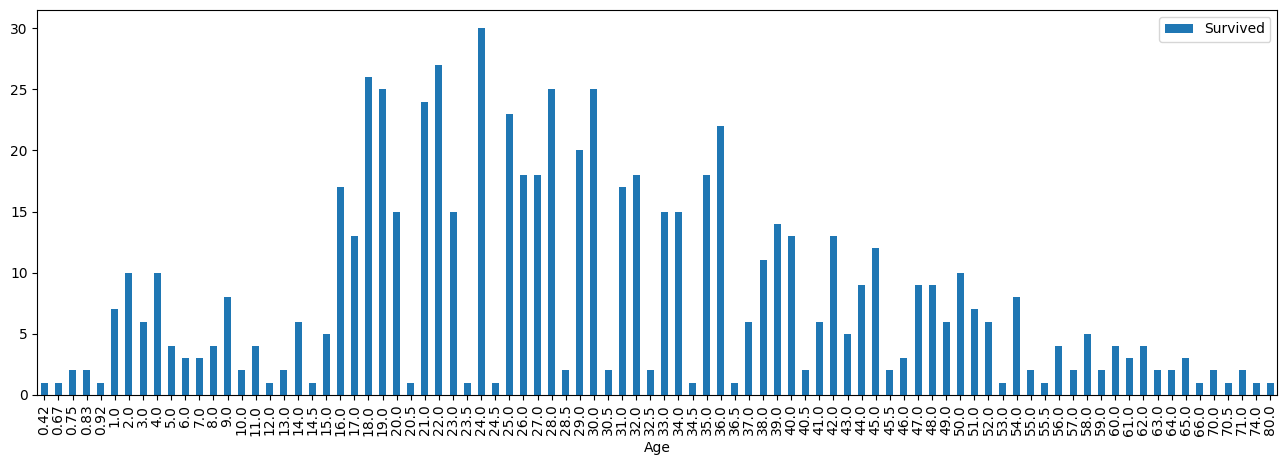

In [66]:
fig, ax = plt.subplots(figsize=(16, 5))
b.plot(kind="bar", ax=ax);